In [50]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from io import BytesIO
from tqdm import tqdm_notebook
%matplotlib inline

In [12]:
obs_maps = np.load('obs_maps.npz')['arr_0']
agent_positions = np.loadtxt('agent_positions.txt')
goal_coords = np.loadtxt('goal_coords.txt')

In [ ]:
agent_positions

In [21]:
goal_coords[::30]

array([[206., 286.],
       [207., 204.],
       [111., 167.],
       [145., 102.],
       [230.,  82.],
       [240.,  67.],
       [238.,  67.],
       [240.,  67.],
       [240.,  67.],
       [240.,  67.],
       [240.,  67.],
       [240.,  67.],
       [240.,  67.],
       [240.,  67.],
       [240.,  67.],
       [240.,  67.],
       [240.,  67.]])

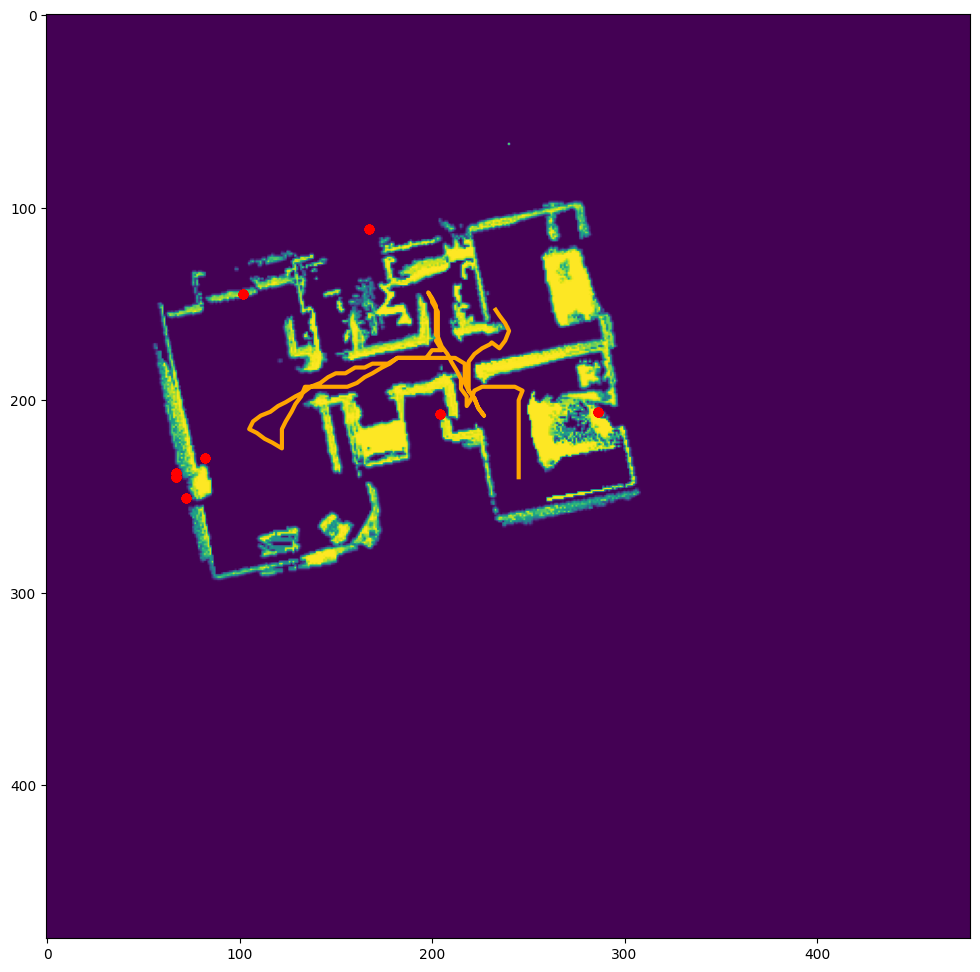

In [54]:
fig = plt.figure(figsize=(12, 12))
plt.imshow(obs_maps[-1])
plt.plot(agent_positions[:, 1], agent_positions[:, 0], color='orange', lw=3)
plt.scatter(goal_coords[:, 1], goal_coords[:, 0], color='r')
fig.savefig('fig.png')

In [46]:
from moviepy.editor import ImageSequenceClip
def get_img_from_fig(fig, dpi=180):
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=dpi)
    buf.seek(0)
    img_arr = np.frombuffer(buf.getvalue(), dtype=np.uint8)
    buf.close()
    img = cv2.imdecode(img_arr, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    return img

In [72]:
%matplotlib agg
frames = []
for i in tqdm_notebook(range(len(obs_maps))):
    fig = plt.figure(figsize=(8, 8))
    plt.imshow(obs_maps[i])
    plt.plot(agent_positions[:i + 1, 1], agent_positions[:i + 1, 0], color='orange', lw=2)
    plt.scatter(goal_coords[i:i + 1, 1], goal_coords[i:i + 1, 0], color='r')
    plot_img_np = get_img_from_fig(fig)
    frames.append(plot_img_np)

  0%|          | 0/499 [00:00<?, ?it/s]

In [73]:
frame = ImageSequenceClip(frames, fps=5)
frame.ipython_display(maxduration=500)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [74]:
frame.write_gif('poni_exploration.gif')

MoviePy - Building file poni_exploration.gif with imageio.


## FBE-RL PIPELINE

In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from io import BytesIO
from tqdm import tqdm_notebook
%matplotlib inline

In [2]:
eval_episodes = [3, 4, 5, 7, 99, 100, 101, 102, 103, 104, 106, 107, 198, 199, 200, 202, 203, 204, 205, 206, 297, 299, 300, 301, 303, 304, 305, 396, 397, 398, 399, 401, 402, 403, 495, 496, 497, 498, 499, 501, 503, 594, 595, 596, 597, 598, 599, 600, 602, 693, 694, 696, 697, 698, 700, 701, 792, 793, 794, 795, 797, 798, 799, 800, 891, 894, 895, 896, 899, 990, 991, 992, 994, 996, 997, 998]
objgoals = ['plant', 'chair', 'sofa', 'tv_monitor', 'toilet', 'bed']

In [3]:
def find_objgoal(i):
    ls = os.listdir('fbe_maps')
    for objgoal in objgoals:
        if 'episode_{}_{}'.format(i, objgoal) in ls:
            return objgoal
    return None

In [4]:
ii = 3
objectgoal = find_objgoal(ii)
print('Objectgoal:', objectgoal)
data_dir = 'fbe_maps/episode_{}_{}'.format(ii, objectgoal)
maps = np.load(os.path.join(data_dir, 'maps.npz'))['arr_0']
#maps = maps.astype(np.uint8)
robot_poses = np.loadtxt(os.path.join(data_dir, 'poses.txt'))
goal_coords = np.loadtxt(os.path.join(data_dir, 'goal_coords.txt'))
rgbs = np.load(os.path.join(data_dir, 'rgbs.npz'))['arr_0']
depths = np.load(os.path.join(data_dir, 'depths.npz'))['arr_0']
actions = np.load(os.path.join(data_dir, 'actions.txt.npz'))['arr_0']

Objectgoal: plant


In [5]:
from moviepy.editor import ImageSequenceClip
def get_img_from_fig(fig, dpi=180):
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=dpi)
    buf.seek(0)
    img_arr = np.frombuffer(buf.getvalue(), dtype=np.uint8)
    buf.close()
    img = cv2.imdecode(img_arr, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    return img

In [12]:
%matplotlib agg
frames = []
for i in tqdm_notebook(range(len(maps))):
    fig = plt.figure(figsize=(10, 3))
    plt.subplot(1, 3, 1)
    plt.imshow(rgbs[i])
    plt.subplot(1, 3, 2)
    plt.title('Skill: {}'.format(actions[i][1]), fontsize=16)
    plt.imshow((depths[i] - 0.5) / 4.5, cmap='gray')
    plt.subplot(1, 3, 3)
    plt.imshow(maps[i, 150:450, 450:150:-1, 1])
    if actions[i][1] in ['FBE', 'FBE Goalreacher']:
        plt.scatter([-goal_coords[i][0] / 0.07 + 150], [goal_coords[i][1] / 0.07 + 150], color='r')
    plt.plot(-robot_poses[:i + 1, 0] / 0.07 + 150, -robot_poses[:i + 1, 1] / 0.07 + 150, color='orange')
    plot_img_np = get_img_from_fig(fig)
    frames.append(plot_img_np)

  0%|          | 0/110 [00:00<?, ?it/s]

In [13]:
frame = ImageSequenceClip(frames, fps=5)
#frame.ipython_display(maxduration=500)
frame.write_gif('episode_3.gif')

MoviePy - Building file episode_3.gif with imageio.
